<h1>Amazon Employee Access Challenge </h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing needed modules/packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import sparse

In [3]:
#importing the data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.shape,test.shape

((32769, 10), (58921, 10))

In [4]:
ohe_train = sparse.load_npz('data/ohe_train.npz')
ohe_test = sparse.load_npz('data/ohe_test.npz')
ohe_train.shape,ohe_test.shape

((32769, 4500), (58921, 4500))

In [5]:
fc_df_train=pd.read_csv('data/fc_df_train.csv')
fc_df_test=pd.read_csv('data/fc_df_test.csv')
fc_df_train.shape,fc_df_test.shape

((32769, 9), (58921, 9))

In [6]:
rc_df_train=pd.read_csv('data/rc_df_train.csv')
rc_df_test=pd.read_csv('data/rc_df_test.csv')
rc_df_train.shape,rc_df_test.shape

((32769, 9), (58921, 9))

In [7]:
train_svd = pd.read_csv('data/train_svd.csv')
test_svd=pd.read_csv('data/test_svd.csv')
train_svd.shape,test_svd.shape

((32769, 72), (58921, 72))

In [8]:
train_data=train.drop(columns=['ACTION'],axis=1)
train_data.shape

(32769, 9)

In [9]:
y_true = train['ACTION']
y_true.shape

(32769,)

In [10]:
test_data=test.drop(columns=['id'],axis=1)
test_data.shape

(58921, 9)

**Build a Model**

Initially lets use linear models like KNN, Linear SVM , Logistic Regression etc... and compare these models to see which models perfroms better.

We will also use the data obtained using feature engineering techniques to see whether the model's performance is getting improved while any new featuers are added

**KNN classifier**

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = np.arange(1,100,5)
lr= KNeighborsClassifier(n_jobs=-1)
parameters={'n_neighbors':n_neighbors}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(train_data,y_true)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   17.6s finished


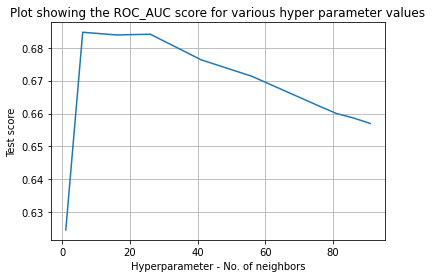

In [12]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_n_neighbors')
plt.plot(results['param_n_neighbors'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - No. of neighbors');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [13]:
best_c=best_model.best_params_['n_neighbors']
best_c

6

In [14]:
model = KNeighborsClassifier(n_neighbors=best_c,n_jobs=-1)
model.fit(train_data,y_true)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

In [15]:
predictions = model.predict_proba(test_data)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/knn.csv", index = False)

     Kaggle Score(test AUC )                                                     private score          public score   

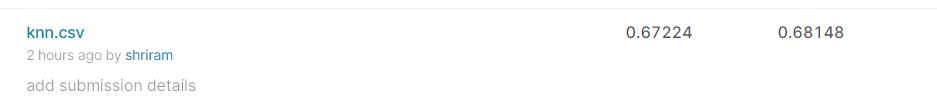

**KNN classifier - OHE**

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = np.arange(1,100,5)
lr= KNeighborsClassifier(n_jobs=-1)
parameters={'n_neighbors':n_neighbors}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,scoring='roc_auc',n_jobs=2)
best_model = clf.fit(ohe_train,y_true)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  5.8min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  8.0min finished


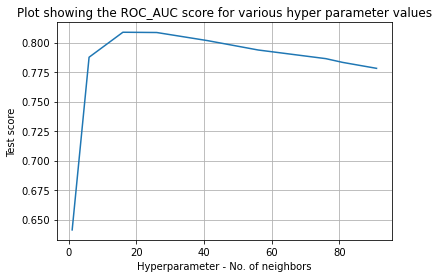

In [17]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_n_neighbors')
plt.plot(results['param_n_neighbors'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - No. of neighbors');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [18]:
best_c=best_model.best_params_['n_neighbors']
best_c

16

In [19]:
model = KNeighborsClassifier(n_neighbors=best_c,n_jobs=-1)
model.fit(ohe_train,y_true)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

In [20]:
predictions = model.predict_proba(ohe_test)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/knn_ohe.csv", index = False)

     Kaggle Score(test AUC )                                                     private score          public score   

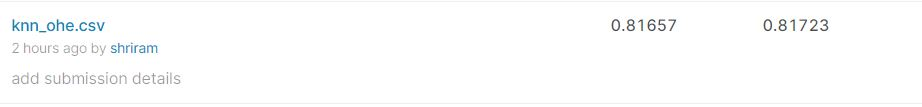

**KNN classifier - Response Coding**

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = np.arange(1,100,5)
lr= KNeighborsClassifier(n_jobs=-1)
parameters={'n_neighbors':n_neighbors}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(rc_df_train,y_true)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.0s finished


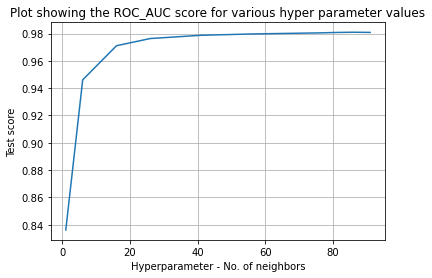

In [22]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_n_neighbors')
plt.plot(results['param_n_neighbors'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - No. of neighbors');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [23]:
best_c=best_model.best_params_['n_neighbors']
best_c

86

In [24]:
model = KNeighborsClassifier(n_neighbors=best_c,n_jobs=-1)
model.fit(rc_df_train,y_true)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

In [25]:
predictions = model.predict_proba(rc_df_test)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/knn_rc.csv", index = False)

     Kaggle Score(test AUC )                                                     private score          public score   

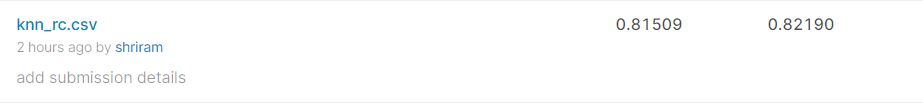

**KNN classifier - Frequency Coding**

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = np.arange(1,100,5)
lr= KNeighborsClassifier(n_jobs=-1)
parameters={'n_neighbors':n_neighbors}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(fc_df_train,y_true)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   17.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.0s finished


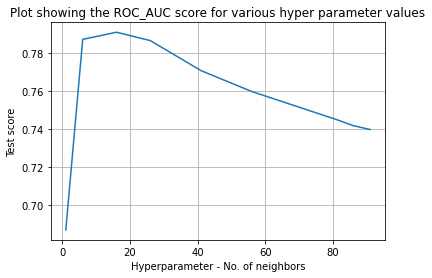

In [27]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_n_neighbors')
plt.plot(results['param_n_neighbors'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - No. of neighbors');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [28]:
best_c=best_model.best_params_['n_neighbors']
best_c

16

In [29]:
model = KNeighborsClassifier(n_neighbors=best_c,n_jobs=-1)
model.fit(fc_df_train,y_true)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

In [30]:
predictions = model.predict_proba(fc_df_test)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/knn_fc.csv", index = False)

     Kaggle Score(test AUC )                                                     private score          public score   

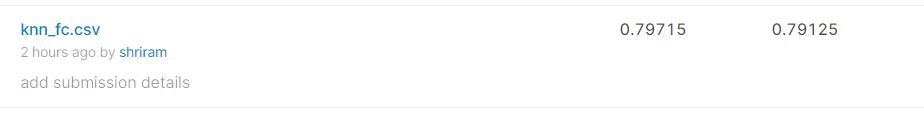

**KNN classifier - SVD **

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = np.arange(1,100,5)
lr= KNeighborsClassifier(n_jobs=-1)
parameters={'n_neighbors':n_neighbors}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(train_svd,y_true)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   35.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   50.0s finished


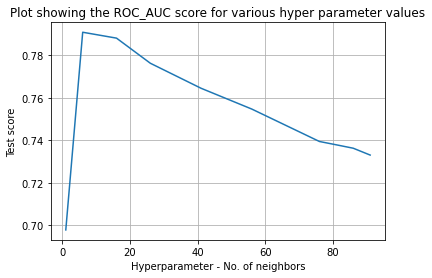

In [32]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_n_neighbors')
plt.plot(results['param_n_neighbors'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - No. of neighbors');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [33]:
best_c=best_model.best_params_['n_neighbors']
best_c

6

In [34]:
model = KNeighborsClassifier(n_neighbors=best_c,n_jobs=-1)
model.fit(train_svd,y_true)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

In [35]:
predictions = model.predict_proba(test_svd)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/knn_svd.csv", index = False)

     Kaggle Score(test AUC )                                                     private score          public score   

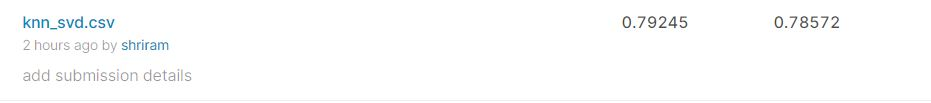

In [168]:
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists
from prettytable import PrettyTable

x=PrettyTable(['Algorithm','Test AUC score'])
x.add_row(['KNN',0.68148])
x.add_row(['KNN (using OHE)',0.81723])
x.add_row(['KNN (Using Frequency coding)',0.79125])
x.add_row(['KNN (Using Response Coding)',0.82190])
x.add_row(['KNN (Using SVD)',0.78572])
print(x)

+------------------------------+----------------+
|          Algorithm           | Test AUC score |
+------------------------------+----------------+
|             KNN              |    0.68148     |
|       KNN (using OHE)        |    0.81723     |
| KNN (Using Frequency coding) |    0.79125     |
| KNN (Using Response Coding)  |     0.8219     |
|       KNN (Using SVD)        |    0.78572     |
+------------------------------+----------------+


**OBSERVATIONS**

Applying KNN on raw data (i.e. without any feature engineering doesn't perform well)

KNN algorithm performs well for One Hot encoded features and Response encoding features.

For  SVD encoding, the model's performance doesn't seem to improve much

**SVM **

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import LinearSVC
C_val = uniform(loc=0, scale=4)
lr= LinearSVC(verbose=2,random_state=42,class_weight='balanced',max_iter=2000)
parameters={'C':C_val}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(train_data,y_true)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.5min finished


[LibLinear]

C:\Users\shri1\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


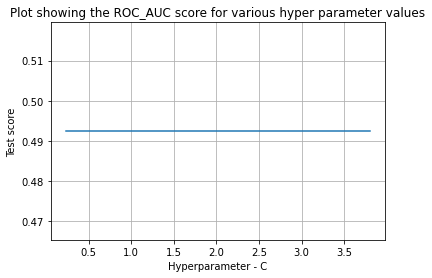

In [38]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_C')
results
plt.plot(results['param_C'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - C');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [39]:
best_c=best_model.best_params_['C']
best_c

1.49816047538945

In [40]:
#https://stackoverflow.com/questions/26478000/converting-linearsvcs-decision-function-to-probabilities-scikit-learn-python
from sklearn.calibration import CalibratedClassifierCV
model = LinearSVC(C=best_c,verbose=1,random_state=42,class_weight='balanced',max_iter=2000)
model = CalibratedClassifierCV(model)
model.fit(train_data,y_true)

[LibLinear]

C:\Users\shri1\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

C:\Users\shri1\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

C:\Users\shri1\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


CalibratedClassifierCV(base_estimator=LinearSVC(C=1.49816047538945,
                                                class_weight='balanced',
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=2000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=42, tol=0.0001,
                                                verbose=1),
                       cv='warn', method='sigmoid')

In [41]:
predictions = model.predict_proba(test_data)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/svm.csv", index = False)

     Kaggle Score(test AUC )                                                     private score          public score   

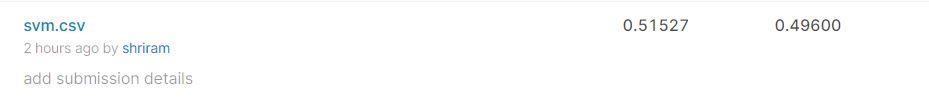

**SVM - OHE**

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import LinearSVC
C_val = uniform(loc=0, scale=4)
lr= LinearSVC(verbose=2,random_state=42,class_weight='balanced',max_iter=1000)
parameters={'C':C_val}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,scoring='roc_auc',n_jobs=2)
best_model = clf.fit(ohe_train,y_true)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   45.9s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  1.1min finished


[LibLinear]

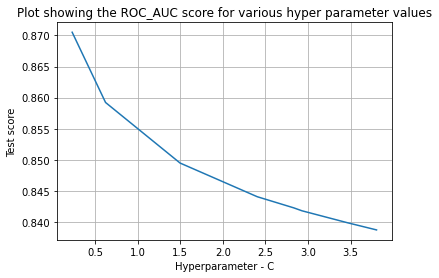

In [43]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_C')
results
plt.plot(results['param_C'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - C');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [44]:
best_c=best_model.best_params_['C']
best_c

0.23233444867279784

In [45]:
#https://stackoverflow.com/questions/26478000/converting-linearsvcs-decision-function-to-probabilities-scikit-learn-python
from sklearn.calibration import CalibratedClassifierCV
model = LinearSVC(C=best_c,verbose=1,random_state=42,class_weight='balanced',dual=False)
model = CalibratedClassifierCV(model)
model.fit(ohe_train,y_true)

[LibLinear][LibLinear][LibLinear]

CalibratedClassifierCV(base_estimator=LinearSVC(C=0.23233444867279784,
                                                class_weight='balanced',
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=42, tol=0.0001,
                                                verbose=1),
                       cv='warn', method='sigmoid')

In [46]:
predictions = model.predict_proba(ohe_test)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/svm_ohe.csv", index = False)

     Kaggle Score(test AUC )                                                     private score          public score   

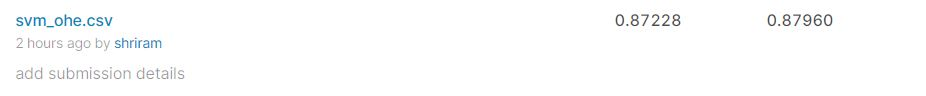

**SVM - Frequency Coding **

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import LinearSVC
C_val = uniform(loc=0, scale=4)
lr= LinearSVC(verbose=2,random_state=42,class_weight='balanced',max_iter=1000)
parameters={'C':C_val}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(fc_df_train,y_true)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   59.7s finished


[LibLinear]

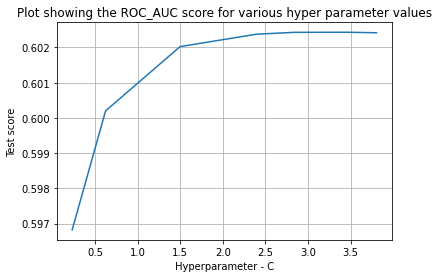

In [48]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_C')
results
plt.plot(results['param_C'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - C');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [49]:
best_c=best_model.best_params_['C']
best_c

3.4647045830997407

In [50]:
#https://stackoverflow.com/questions/26478000/converting-linearsvcs-decision-function-to-probabilities-scikit-learn-python
from sklearn.calibration import CalibratedClassifierCV
model = LinearSVC(C=best_c,verbose=1,random_state=42,class_weight='balanced')
model = CalibratedClassifierCV(model)
model.fit(fc_df_train,y_true)

[LibLinear][LibLinear][LibLinear]

CalibratedClassifierCV(base_estimator=LinearSVC(C=3.4647045830997407,
                                                class_weight='balanced',
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=42, tol=0.0001,
                                                verbose=1),
                       cv='warn', method='sigmoid')

In [51]:
predictions = model.predict_proba(fc_df_test)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/svm_fc.csv", index = False)

     Kaggle Score(test AUC )                                                     private score          public score   

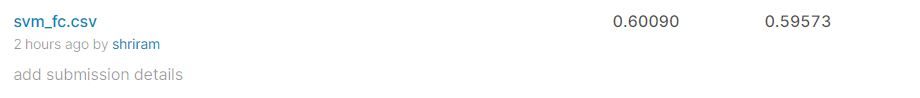

**SVM - RESPONSE CODING**

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import LinearSVC
C_val = uniform(loc=0, scale=4)
lr= LinearSVC(verbose=2,random_state=42,class_weight='balanced',max_iter=1000)
parameters={'C':C_val}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(rc_df_train,y_true)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


[LibLinear]

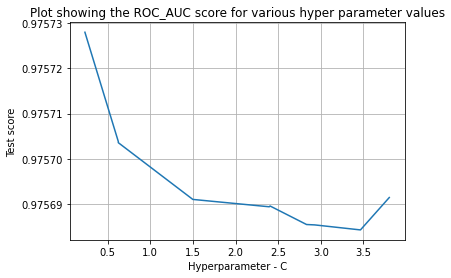

In [53]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_C')
results
plt.plot(results['param_C'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - C');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [54]:
best_c=best_model.best_params_['C']
best_c

0.23233444867279784

In [55]:
#https://stackoverflow.com/questions/26478000/converting-linearsvcs-decision-function-to-probabilities-scikit-learn-python
from sklearn.calibration import CalibratedClassifierCV
model = LinearSVC(C=best_c,verbose=1,random_state=42,class_weight='balanced')
model = CalibratedClassifierCV(model)
model.fit(rc_df_train,y_true)

[LibLinear][LibLinear][LibLinear]

CalibratedClassifierCV(base_estimator=LinearSVC(C=0.23233444867279784,
                                                class_weight='balanced',
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=42, tol=0.0001,
                                                verbose=1),
                       cv='warn', method='sigmoid')

In [56]:
predictions = model.predict_proba(rc_df_test)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/svm_rc.csv", index = False)

     Kaggle Score(test AUC )                                                     private score          public score   

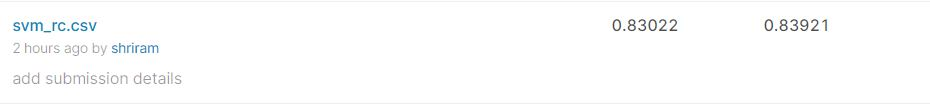

**SVM - SVD**

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import LinearSVC
C_val = uniform(loc=0, scale=4)
lr= LinearSVC(verbose=2,random_state=42,class_weight='balanced',max_iter=1500)
parameters={'C':C_val}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(train_svd,y_true)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.4min finished


[LibLinear]

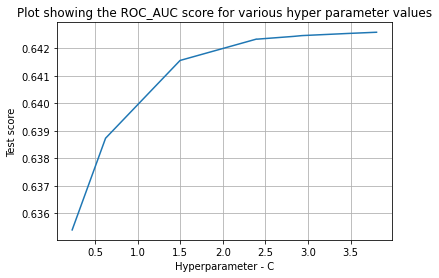

In [58]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_C')
results
plt.plot(results['param_C'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - C');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [59]:
best_c=best_model.best_params_['C']
best_c

3.8028572256396647

In [60]:
#https://stackoverflow.com/questions/26478000/converting-linearsvcs-decision-function-to-probabilities-scikit-learn-python
from sklearn.calibration import CalibratedClassifierCV
model = LinearSVC(C=best_c,verbose=1,random_state=42,class_weight='balanced',max_iter=1500)
model = CalibratedClassifierCV(model)
model.fit(train_svd,y_true)

[LibLinear][LibLinear][LibLinear]

CalibratedClassifierCV(base_estimator=LinearSVC(C=3.8028572256396647,
                                                class_weight='balanced',
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1500,
                                                multi_class='ovr', penalty='l2',
                                                random_state=42, tol=0.0001,
                                                verbose=1),
                       cv='warn', method='sigmoid')

In [61]:
predictions = model.predict_proba(test_svd)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/svm_svd.csv", index = False)

     Kaggle Score(test AUC )                                                     private score          public score   

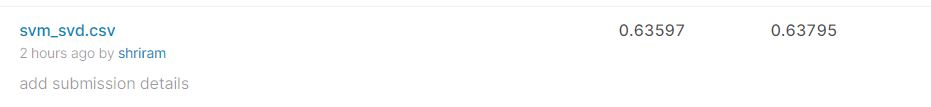

In [169]:
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists
from prettytable import PrettyTable

x=PrettyTable(['Algorithm','Test AUC score'])
x.add_row(['SVM',0.49600])
x.add_row(['SVM (using OHE)',0.87960])
x.add_row(['SVM (Using Frequency coding)',0.59573])
x.add_row(['SVM (Using Response Coding)',0.83921])
x.add_row(['SVM (Using SVD)',0.63795])
print(x)

+------------------------------+----------------+
|          Algorithm           | Test AUC score |
+------------------------------+----------------+
|             SVM              |     0.496      |
|       SVM (using OHE)        |     0.8796     |
| SVM (Using Frequency coding) |    0.59573     |
| SVM (Using Response Coding)  |    0.83921     |
|       SVM (Using SVD)        |    0.63795     |
+------------------------------+----------------+


**OBSERVATIONS**

Using One Hot encoded features , SVM model seems to perform much better than the KNN model built using OHE.

The response encoded features are also working well with SVM , as the test AUC score is better while using response encoded features.



**Logistic Regression**

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
C_val = uniform(loc=0, scale=4)
lr= LogisticRegression(verbose=2,random_state=42,class_weight='balanced',solver='lbfgs',max_iter=500,n_jobs=-1)
parameters={'C':C_val}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,n_iter=100,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(train_data,y_true)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.8s finished


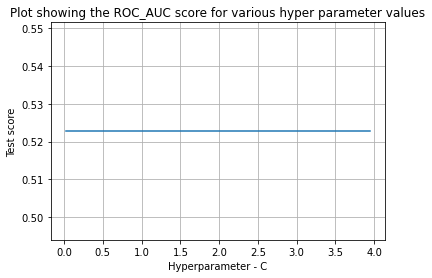

In [64]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_C')
results
plt.plot(results['param_C'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - C');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [65]:
best_c=best_model.best_params_['C']
best_c

1.49816047538945

In [66]:
model = LogisticRegression(C=best_c,verbose=1,n_jobs=-1,random_state=42,class_weight='balanced',solver='lbfgs')
model.fit(train_data,y_true)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.9s finished


LogisticRegression(C=1.49816047538945, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [67]:
predictions = model.predict_proba(test_data)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/log_regn.csv", index = False)

     Kaggle Score(test AUC )                                                     private score          public score   

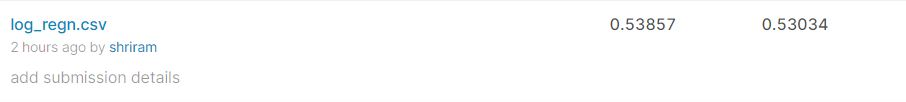

**Logistic Regression (Using One Hot Encoding)**

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
C_val = uniform(loc=0, scale=4)
lr= LogisticRegression(verbose=2,random_state=42,class_weight='balanced',solver='lbfgs',max_iter=500,n_jobs=-1)
parameters={'C':C_val}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,n_iter=100,scoring='roc_auc',n_jobs=2)
best_model = clf.fit(ohe_train,y_true)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   38.3s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:  4.9min
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:  6.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.3s finished


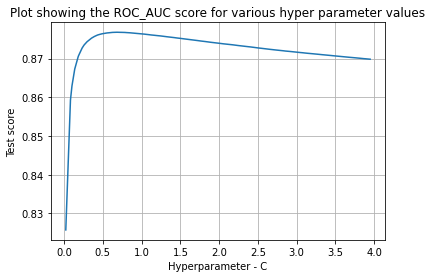

In [69]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_C')
results
plt.plot(results['param_C'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - C');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [70]:
best_c=best_model.best_params_['C']
best_c

0.6820964947491661

In [71]:
model = LogisticRegression(C=best_c,verbose=1,n_jobs=-1,random_state=42,class_weight='balanced',solver='lbfgs')
model.fit(ohe_train,y_true)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.8s finished


LogisticRegression(C=0.6820964947491661, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [72]:
predictions = model.predict_proba(ohe_test)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/log_regn_ohe.csv", index = False)

     Kaggle Score(test AUC )                                                     private score          public score   

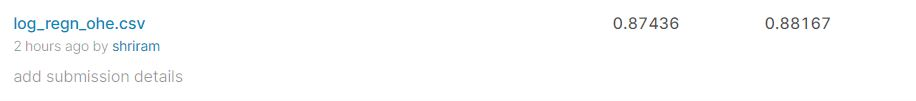

**Logistic Regression (Using SVD)**

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
C_val = uniform(loc=0, scale=8)
lr= LogisticRegression(verbose=2,random_state=42,class_weight='balanced',solver='lbfgs',n_jobs=-1,max_iter=500)
parameters={'C':C_val}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,n_iter=100,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(train_svd,y_true)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.4s finished


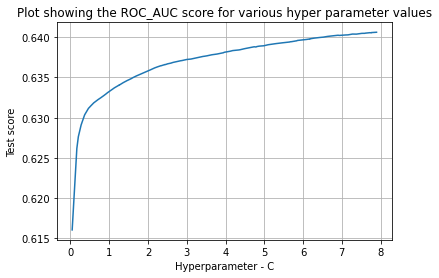

In [74]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_C')
results
plt.plot(results['param_C'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - C');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [75]:
best_c=best_model.best_params_['C']
best_c

7.895095492804138

In [76]:
model = LogisticRegression(C=best_c,verbose=1,n_jobs=-1,random_state=42,class_weight='balanced',solver='lbfgs')
model.fit(train_svd,y_true)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.2s finished


LogisticRegression(C=7.895095492804138, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [77]:
predictions = model.predict_proba(test_svd)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/log_regn_svd.csv", index = False)

     Kaggle Score(test AUC )                                                     private score          public score   

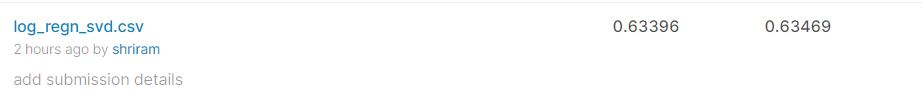

**Logistic Regression (Using Frequency coding)**

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
C_val = uniform(loc=0, scale=8)
lr= LogisticRegression(verbose=2,random_state=42,class_weight='balanced',solver='lbfgs',max_iter=500,n_jobs=-1)
parameters={'C':C_val}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,n_iter=100,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(fc_df_train,y_true)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s finished


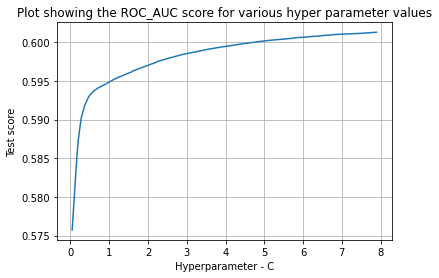

In [79]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_C')
results
plt.plot(results['param_C'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - C');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [80]:
best_c=best_model.best_params_['C']
best_c

7.895095492804138

In [81]:
model = LogisticRegression(C=best_c,verbose=1,n_jobs=-1,random_state=42,class_weight='balanced',solver='lbfgs')
model.fit(fc_df_train,y_true)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.3s finished


LogisticRegression(C=7.895095492804138, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [82]:
predictions = model.predict_proba(fc_df_test)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/log_regn_fc.csv", index = False)

     Kaggle Score(test AUC )                                                     private score          public score   

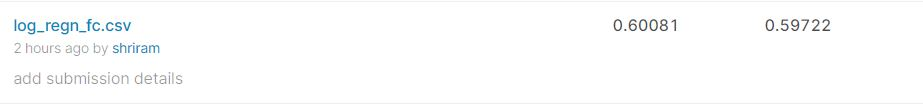

**Logistic Regression (Using Response coding)**

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
C_val = uniform(loc=0, scale=8)
lr= LogisticRegression(verbose=2,random_state=42,class_weight='balanced',solver='lbfgs',max_iter=600,n_jobs=-1)
parameters={'C':C_val}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,n_iter=100,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(rc_df_train,y_true)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.7s finished


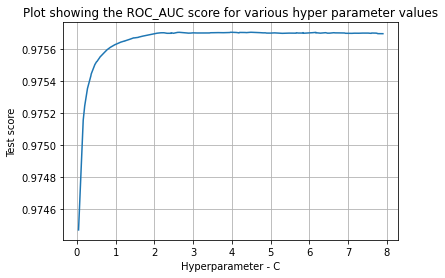

In [84]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_C')
results
plt.plot(results['param_C'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - C');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [85]:
best_c=best_model.best_params_['C']
best_c

3.9614152808901615

In [86]:
model = LogisticRegression(C=best_c,verbose=1,n_jobs=-1,random_state=42,class_weight='balanced',solver='lbfgs')
model.fit(rc_df_train,y_true)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.2s finished


LogisticRegression(C=3.9614152808901615, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [87]:
predictions = model.predict_proba(rc_df_test)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/log_regn_rc.csv", index = False)

     Kaggle Score(test AUC )                                                     private score          public score   

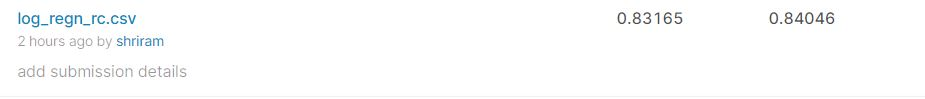

In [170]:
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists
from prettytable import PrettyTable

x=PrettyTable(['Algorithm','Test AUC score'])
x.add_row(['Logistic Regression',0.53034])
x.add_row(['Logistic Regression (using OHE)',0.88167])
x.add_row(['Logistic Regression (Using Frequency coding)',0.59722])
x.add_row(['Logistic Regression (Using Response Coding)',0.84046])
x.add_row(['Logistic Regression (Using SVD)',0.63469])
print(x)

+----------------------------------------------+----------------+
|                  Algorithm                   | Test AUC score |
+----------------------------------------------+----------------+
|             Logistic Regression              |    0.53034     |
|       Logistic Regression (using OHE)        |    0.88167     |
| Logistic Regression (Using Frequency coding) |    0.59722     |
| Logistic Regression (Using Response Coding)  |    0.84046     |
|       Logistic Regression (Using SVD)        |    0.63469     |
+----------------------------------------------+----------------+


**OBSERVATIONS**


So far , the best model seems to be Logistic Regression with One Hot encoded features as it gives the max. AUC score of 0.882.

Similar to SVM, the Response coded features seems to be more useful when compared to other generated features



**Random Forest**

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42,class_weight='balanced',n_jobs=-1)
from scipy import stats
n_estimators = [10,20,50,100,200,500,700,1000]
max_depth = [1,2,5,10,12,15,20,25]
max_features=[1,2,3,4,5]
min_samples_split=[2,5,7,10,20]

params = {'n_estimators':n_estimators,
         'max_depth':max_depth,
         'max_features':max_features,
         'min_samples_split':min_samples_split}

clf = RandomizedSearchCV(rfc,params,random_state=42,cv=5,verbose=1,n_iter=100,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(train_data,y_true)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 20.1min finished


In [90]:
results = pd.DataFrame(best_model.cv_results_)
results.sort_values('mean_test_score',ascending=False,inplace=True)
a=['param_'+str(each) for each in params.keys()]
a.append('mean_test_score')
results[a].head(10)

,param_n_estimators,param_max_depth,param_max_features,param_min_samples_split,mean_test_score
78,700,25,2,7,0.862951
62,500,25,3,5,0.862863
79,500,25,1,10,0.862223
55,200,25,2,5,0.860996
22,200,25,4,10,0.860981
85,1000,20,3,7,0.860491
84,1000,25,5,2,0.860339
20,1000,25,3,2,0.860199
33,700,25,4,2,0.859577
82,700,20,5,20,0.858877


In [91]:
n_estimators=clf.best_params_['n_estimators']
max_features=clf.best_params_['max_features']
max_depth=clf.best_params_['max_depth']
min_samples_split=clf.best_params_['min_samples_split']
n_estimators,max_features,max_depth,min_samples_split

(700, 2, 25, 7)

In [92]:
model=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features,
                             min_samples_split=min_samples_split,
                             random_state=42,class_weight='balanced',n_jobs=-1)

model.fit(train_data,y_true)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=25, max_features=2,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=700, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

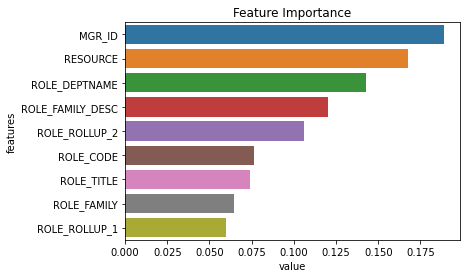

In [93]:
features=train_data.columns
importance=model.feature_importances_
res=pd.DataFrame({'features':features,'value':importance})
res=res.sort_values('value',ascending=False)
sb.barplot('value','features',data=res);
plt.title('Feature Importance');

**Feature Importances**

MGR_ID seems to be the most important feature for this model in predicting the class label followed by RESOURCE , ROLE_DEPTNAME etc...

In [94]:
predictions = model.predict_proba(test_data)[:,1]

submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions

submit.to_csv("results/random_forest.csv", index = False)

     Kaggle Score(test AUC )                                                            private score          public score   

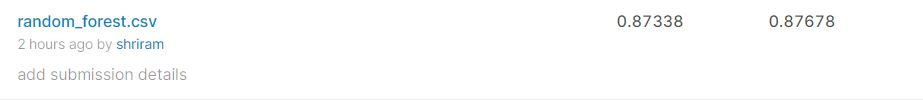

**Random Forest  SVD**

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42,class_weight='balanced',n_jobs=-1)
from scipy import stats
n_estimators = [10,20,50,100,200,500,700,1000]
max_depth = [1,2,5,10,12,15,20,25]
max_features=[1,2,3,4,5]
min_samples_split=[2,5,7,10,20]

params = {'n_estimators':n_estimators,
         'max_depth':max_depth,
         'max_features':max_features,
         'min_samples_split':min_samples_split}

clf = RandomizedSearchCV(rfc,params,random_state=42,cv=5,verbose=1,n_iter=100,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(train_svd,y_true)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 26.7min finished


In [96]:
results = pd.DataFrame(best_model.cv_results_)
results.sort_values('mean_test_score',ascending=False,inplace=True)
a=['param_'+str(each) for each in params.keys()]
a.append('mean_test_score')
results[a].head(10)

,param_n_estimators,param_max_depth,param_max_features,param_min_samples_split,mean_test_score
84,1000,25,5,2,0.853490
33,700,25,4,2,0.853287
20,1000,25,3,2,0.852782
62,500,25,3,5,0.852051
22,200,25,4,10,0.851328
82,700,20,5,20,0.851208
85,1000,20,3,7,0.850869
78,700,25,2,7,0.850621
55,200,25,2,5,0.850441
54,100,20,5,20,0.849401


In [97]:
n_estimators=clf.best_params_['n_estimators']
max_features=clf.best_params_['max_features']
max_depth=clf.best_params_['max_depth']
min_samples_split=clf.best_params_['min_samples_split']
n_estimators,max_features,max_depth,min_samples_split

(1000, 5, 25, 2)

In [98]:
model=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features,
                             min_samples_split=min_samples_split,
                             random_state=42,class_weight='balanced',n_jobs=-1)

model.fit(train_svd,y_true)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=25, max_features=5,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

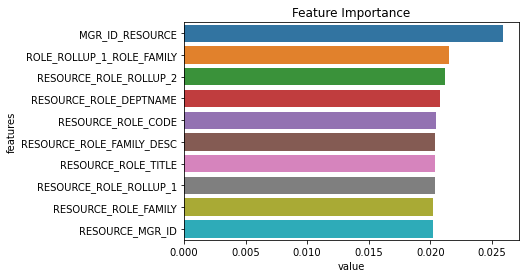

In [99]:
features=train_svd.columns
importance=model.feature_importances_
res=pd.DataFrame({'features':features,'value':importance})
res=res.sort_values('value',ascending=False)
sb.barplot('value','features',data=res[:10]);
plt.title('Feature Importance');

**Feature Importance**

In this random forest model built using SVD encoded features ,  MGR_ID_RESOURCE looks like the feature with high importance followed by ROLE_ROLLUP_1_ROLE_FAMILY , RESOURCE_ROLE_ROLLUP_2 and so on...

In [100]:
predictions = model.predict_proba(test_svd)[:,1]

submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions

submit.to_csv("results/random_forest_svd.csv", index = False)

     Kaggle Score(test AUC )                                                            private score          public score   

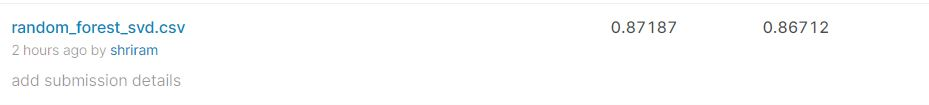

**Random Forest _OHE **

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42,class_weight='balanced',n_jobs=-1)
from scipy import stats
n_estimators = [10,20,50,100,200,500,700,1000]
max_depth = [1,2,5,10,12,15,20,25]
max_features=[1,2,3,4,5]
min_samples_split=[2,5,7,10,20]

params = {'n_estimators':n_estimators,
         'max_depth':max_depth,
         'max_features':max_features,
         'min_samples_split':min_samples_split}

clf = RandomizedSearchCV(rfc,params,random_state=42,cv=5,verbose=1,n_iter=100,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(ohe_train,y_true)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.4min finished


In [102]:
results = pd.DataFrame(best_model.cv_results_)
results.sort_values('mean_test_score',ascending=False,inplace=True)
a=['param_'+str(each) for each in params.keys()]
a.append('mean_test_score')
results[a].head(10)

,param_n_estimators,param_max_depth,param_max_features,param_min_samples_split,mean_test_score
78,700,25,2,7,0.860103
85,1000,20,3,7,0.856983
62,500,25,3,5,0.854030
11,1000,15,3,7,0.850302
6,500,20,2,5,0.849433
25,700,15,4,7,0.842587
19,700,15,4,5,0.841920
82,700,20,5,20,0.839801
69,500,10,2,20,0.839679
79,500,25,1,10,0.839319


In [103]:
n_estimators=clf.best_params_['n_estimators']
max_features=clf.best_params_['max_features']
max_depth=clf.best_params_['max_depth']
min_samples_split=clf.best_params_['min_samples_split']
n_estimators,max_features,max_depth,min_samples_split

(700, 2, 25, 7)

In [104]:
model=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features,
                             min_samples_split=min_samples_split,
                             random_state=42,class_weight='balanced',n_jobs=-1)

model.fit(ohe_train,y_true)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=25, max_features=2,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=700, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [105]:
predictions = model.predict_proba(ohe_test)[:,1]

submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions

submit.to_csv("results/random_forest_ohe.csv", index = False)

     Kaggle Score(test AUC )                                                            private score          public score   

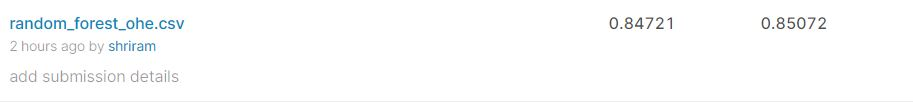

**Random Forest + Frequency Encoding**

In [30]:
mod_train = pd.concat((train_data,fc_df_train),axis=1)
mod_train.shape

(32769, 18)

In [31]:
mod_test = pd.concat((test_data,fc_df_test),axis=1)
mod_test.shape

(58921, 18)

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42,class_weight='balanced',n_jobs=-1)
from scipy import stats
n_estimators = [10,20,50,100,200,500,700,1000]
max_depth = [1,2,5,10,12,15,20,25]
max_features=[1,2,3,4,5]
min_samples_split=[2,5,7,10,20]

params = {'n_estimators':n_estimators,
         'max_depth':max_depth,
         'max_features':max_features,
         'min_samples_split':min_samples_split}

clf = RandomizedSearchCV(rfc,params,random_state=42,cv=5,verbose=1,n_iter=100,scoring='roc_auc',n_jobs=-1)
best_model=clf.fit(mod_train,y_true)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.2min finished


In [33]:
results = pd.DataFrame(best_model.cv_results_)
results.sort_values('mean_test_score',ascending=False,inplace=True)
a=['param_'+str(each) for each in params.keys()]
a.append('mean_test_score')
results[a].head(10)

,param_n_estimators,param_max_depth,param_max_features,param_min_samples_split,mean_test_score
84,1000,25,5,2,0.874714
62,500,25,3,5,0.874460
20,1000,25,3,2,0.874408
33,700,25,4,2,0.874371
79,500,25,1,10,0.873521
78,700,25,2,7,0.873313
55,200,25,2,5,0.872781
85,1000,20,3,7,0.872370
6,500,20,2,5,0.872271
22,200,25,4,10,0.872135


In [34]:
n_estimators=clf.best_params_['n_estimators']
max_features=clf.best_params_['max_features']
max_depth=clf.best_params_['max_depth']
min_samples_split=clf.best_params_['min_samples_split']
n_estimators,max_features,max_depth,min_samples_split

(1000, 5, 25, 2)

In [35]:
model=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features,
                             min_samples_split=min_samples_split,
                             random_state=42,class_weight='balanced',n_jobs=-1)

model.fit(mod_train,y_true)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=25, max_features=5,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

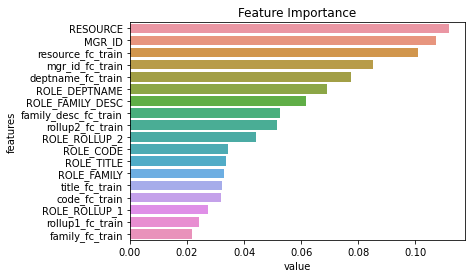

In [36]:
features=mod_train.columns
importance=model.feature_importances_
res=pd.DataFrame({'features':features,'value':importance})
res=res.sort_values('value',ascending=False)
sb.barplot('value','features',data=res);
plt.title('Feature Importance');

This model too has the REOSOURCE as the most important feature followed by MGR_ID , RESOURCE_FC_Train etc...

In [37]:
predictions = model.predict_proba(mod_test)[:,1]

submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions

submit.to_csv("results/ranfor_fc.csv", index = False)

In [38]:
import joblib 
joblib.dump(model,'random_forest_fc.pkl')

['random_forest_fc.pkl']

     Kaggle Score(test AUC )                                                            private score          public score   

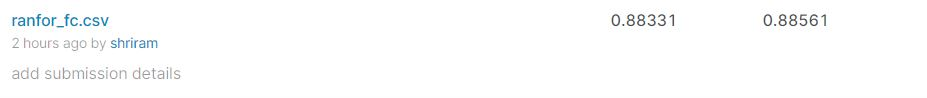

**Random Forest + Response Coding**

In [114]:
mod_train = pd.concat((train_data,rc_df_train),axis=1)
mod_train.shape

(32769, 18)

In [115]:
mod_test = pd.concat((test_data,rc_df_test),axis=1)
mod_test.shape

(58921, 18)

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42,class_weight='balanced',n_jobs=-1)
from scipy import stats
n_estimators = [10,20,50,100,200,500,700,1000]
max_depth = [1,2,5,10,12,15,20,25]
max_features=[1,2,3,4,5]
min_samples_split=[2,5,7,10,20]

params = {'n_estimators':n_estimators,
         'max_depth':max_depth,
         'max_features':max_features,
         'min_samples_split':min_samples_split}

clf = RandomizedSearchCV(rfc,params,random_state=42,cv=5,verbose=1,n_iter=100,scoring='roc_auc',n_jobs=-1)
best_model=clf.fit(mod_train,y_true)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 10.5min finished


In [117]:
results = pd.DataFrame(best_model.cv_results_)
results.sort_values('mean_test_score',ascending=False,inplace=True)
a=['param_'+str(each) for each in params.keys()]
a.append('mean_test_score')
results[a].head(10)

,param_n_estimators,param_max_depth,param_max_features,param_min_samples_split,mean_test_score
84,1000,25,5,2,0.987321
82,700,20,5,20,0.987281
54,100,20,5,20,0.986956
22,200,25,4,10,0.986914
51,1000,15,5,5,0.986823
33,700,25,4,2,0.986743
49,100,15,5,10,0.986431
64,700,10,5,7,0.986412
32,100,12,5,10,0.986336
25,700,15,4,7,0.986297


In [118]:
n_estimators=clf.best_params_['n_estimators']
max_features=clf.best_params_['max_features']
max_depth=clf.best_params_['max_depth']
min_samples_split=clf.best_params_['min_samples_split']
n_estimators,max_features,max_depth,min_samples_split

(1000, 5, 25, 2)

In [119]:
model=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features,
                             min_samples_split=min_samples_split,
                             random_state=42,class_weight='balanced',n_jobs=-1)

model.fit(mod_train,y_true)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=25, max_features=5,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

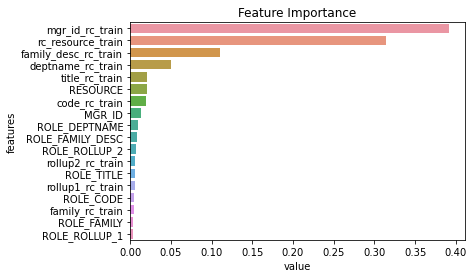

In [120]:
features=mod_train.columns
importance=model.feature_importances_
res=pd.DataFrame({'features':features,'value':importance})
res=res.sort_values('value',ascending=False)
sb.barplot('value','features',data=res);
plt.title('Feature Importance');

In [121]:
predictions = model.predict_proba(mod_test)[:,1]

submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions

submit.to_csv("results/ranfor_rc.csv", index = False)

     Kaggle Score(test AUC )                                                            private score          public score   

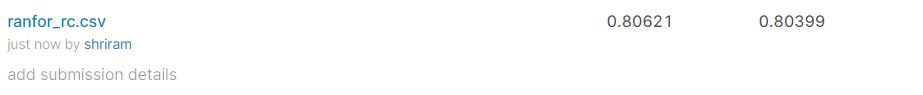

In [171]:
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists
from prettytable import PrettyTable

x=PrettyTable(['Algorithm','Test AUC score'])
x.add_row(['Random Forest',0.87678])
x.add_row(['Random Forest (One hot encoding)',0.85072])
x.add_row(['Random Forest (Using Frequency coding)',0.88561])
x.add_row(['Random Forest (Using Response Coding)',0.80399])
x.add_row(['Random Forest (Using SVD)',0.86712])
print(x)

+----------------------------------------+----------------+
|               Algorithm                | Test AUC score |
+----------------------------------------+----------------+
|             Random Forest              |    0.87678     |
|    Random Forest (One hot encoding)    |    0.85072     |
| Random Forest (Using Frequency coding) |    0.88561     |
| Random Forest (Using Response Coding)  |    0.80399     |
|       Random Forest (Using SVD)        |    0.86712     |
+----------------------------------------+----------------+


**OBSERVATIONS**


When we apply random forest model on the given data (no feature transforms), it performs pretty well (AUC score 0.87678)

If we add the frequency encoded features and then apply random forest , the model's performance seems to improve (value increases to 0.88561)


**XGBoost**

In [123]:
# https://stackoverflow.com/questions/43927725/python-hyperparameter-optimization-for-xgbclassifier-using-randomizedsearchcv
from xgboost import XGBClassifier
from scipy import stats
params = {'n_estimators': [10,20,50,100,200,500,750,1000],
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(),
              'min_child_weight': [1, 2, 3, 4]
             }
xgb = XGBClassifier()
clf = RandomizedSearchCV(xgb,params,random_state=42,cv=5,verbose=1,n_iter=100,scoring='roc_auc',n_jobs=-1)
best_model=clf.fit(train_data,y_true)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 11.0min finished


In [124]:
results = pd.DataFrame(best_model.cv_results_)
results.sort_values('mean_test_score',ascending=False,inplace=True)
a=['param_'+str(each) for each in params.keys()]
a.append('mean_test_score')
results[a].head(10)

,param_n_estimators,param_learning_rate,param_subsample,param_max_depth,param_colsample_bytree,param_min_child_weight,mean_test_score
18,1000,0.048135,0.665922,9,0.330898,2,0.860375
97,750,0.232385,0.907694,6,0.374271,1,0.857483
44,1000,0.060484,0.606429,6,0.642032,2,0.855331
96,500,0.0979629,0.98664,7,0.891897,1,0.853714
62,500,0.0663892,0.328153,9,0.375583,3,0.852542
84,200,0.571989,0.967581,6,0.348337,1,0.850602
53,200,0.540096,0.928319,6,0.27956,1,0.849569
86,1000,0.475848,0.858413,9,0.372018,2,0.848867
49,500,0.160277,0.393098,8,0.636333,2,0.847747
8,750,0.0686033,0.683264,6,0.304614,4,0.846221


In [125]:
colsample_bytree = clf.best_params_['colsample_bytree']
learning_rate=clf.best_params_['learning_rate']
max_depth=clf.best_params_['max_depth']
min_child_weight=clf.best_params_['min_child_weight']
n_estimators=clf.best_params_['n_estimators']
subsample=clf.best_params_['subsample']
colsample_bytree,learning_rate,max_depth,min_child_weight,n_estimators,subsample

(0.3308980248526492, 0.04813501017161418, 9, 2, 1000, 0.6659223566174967)

In [126]:
model = XGBClassifier(colsample_bytree=colsample_bytree,learning_rate=learning_rate,max_depth=max_depth,
                     min_child_weight=min_child_weight,n_estimators=n_estimators,subsample=subsample,n_jobs=-1)

model.fit(train_data,y_true)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3308980248526492, gamma=0,
              learning_rate=0.04813501017161418, max_delta_step=0, max_depth=9,
              min_child_weight=2, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6659223566174967, verbosity=1)

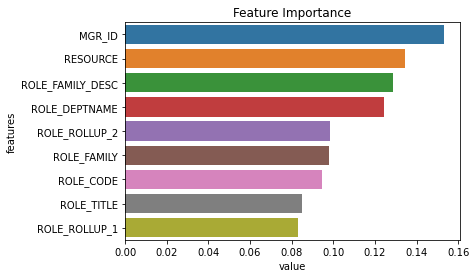

In [127]:
features=train_data.columns
importance=model.feature_importances_
res=pd.DataFrame({'features':features,'value':importance})
res=res.sort_values('value',ascending=False)
sb.barplot('value','features',data=res);
plt.title('Feature Importance');

In [128]:
predictions = model.predict_proba(test_data)[:,1]

submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions

submit.to_csv("results/xgb.csv", index = False)

     Kaggle Score(test AUC )                                                            private score          public score   

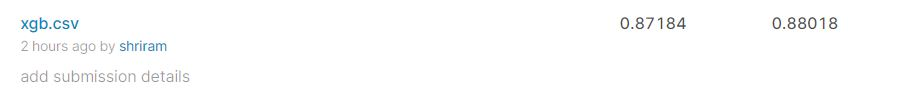

**XGBoost OHE**

In [129]:
# https://stackoverflow.com/questions/43927725/python-hyperparameter-optimization-for-xgbclassifier-using-randomizedsearchcv
from xgboost import XGBClassifier
from scipy import stats
params = {'n_estimators': [10,20,50,100,200,500,750,1000],
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(),
              'min_child_weight': [1, 2, 3, 4]
             }
xgb = XGBClassifier()
clf = RandomizedSearchCV(xgb,params,random_state=42,cv=5,verbose=1,n_iter=100,scoring='roc_auc',n_jobs=-1)
best_model=clf.fit(ohe_train,y_true)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.4min finished


In [130]:
results = pd.DataFrame(best_model.cv_results_)
results.sort_values('mean_test_score',ascending=False,inplace=True)
a=['param_'+str(each) for each in params.keys()]
a.append('mean_test_score')
results[a].head(10)

,param_n_estimators,param_learning_rate,param_subsample,param_max_depth,param_colsample_bytree,param_min_child_weight,mean_test_score
97,750,0.232385,0.907694,6,0.374271,1,0.849761
80,1000,0.385564,0.905351,3,0.820639,1,0.846298
14,200,0.374221,0.802197,7,0.965255,1,0.841194
86,1000,0.475848,0.858413,9,0.372018,2,0.840755
84,200,0.571989,0.967581,6,0.348337,1,0.839749
53,200,0.540096,0.928319,6,0.27956,1,0.839370
96,500,0.0979629,0.98664,7,0.891897,1,0.836363
50,500,0.388683,0.645103,4,0.892047,1,0.835977
92,200,0.478778,0.49442,9,0.946195,1,0.834962
22,1000,0.391846,0.695516,6,0.0314292,1,0.833850


In [131]:
colsample_bytree = clf.best_params_['colsample_bytree']
learning_rate=clf.best_params_['learning_rate']
max_depth=clf.best_params_['max_depth']
min_child_weight=clf.best_params_['min_child_weight']
n_estimators=clf.best_params_['n_estimators']
subsample=clf.best_params_['subsample']
colsample_bytree,learning_rate,max_depth,min_child_weight,n_estimators,subsample

(0.3742707957561203, 0.23238528824013455, 6, 1, 750, 0.9076937063485463)

In [132]:
model = XGBClassifier(colsample_bytree=colsample_bytree,learning_rate=learning_rate,max_depth=max_depth,
                     min_child_weight=min_child_weight,n_estimators=n_estimators,subsample=subsample,n_jobs=-1)

model.fit(ohe_train,y_true)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3742707957561203, gamma=0,
              learning_rate=0.23238528824013455, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=750, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9076937063485463, verbosity=1)

In [133]:
predictions = model.predict_proba(ohe_test)[:,1]

submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions

submit.to_csv("results/xgb_ohe.csv", index = False)

     Kaggle Score(test AUC )                                                            private score          public score   

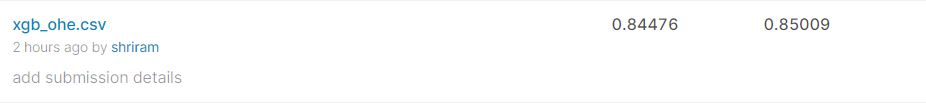

**XGboost + freq.coding**

In [134]:
mod_train = pd.concat((train_data,fc_df_train),axis=1)
mod_train.shape

(32769, 18)

In [135]:
mod_test = pd.concat((test_data,fc_df_test),axis=1)
mod_test.shape

(58921, 18)

In [136]:
from scipy import sparse
mod_train=sparse.csr_matrix(mod_train)
mod_test=sparse.csr_matrix(mod_test)
mod_train.shape,mod_test.shape

((32769, 18), (58921, 18))

In [137]:
# https://stackoverflow.com/questions/43927725/python-hyperparameter-optimization-for-xgbclassifier-using-randomizedsearchcv
from xgboost import XGBClassifier
from scipy import stats
params = {'n_estimators': [10,20,50,100,200,500,750,1000],
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(),
              'min_child_weight': [1, 2, 3, 4]
             }
xgb = XGBClassifier()
clf = RandomizedSearchCV(xgb,params,random_state=42,cv=5,verbose=1,n_iter=100,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(mod_train,y_true)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 15.1min finished


In [138]:
results = pd.DataFrame(best_model.cv_results_)
results.sort_values('mean_test_score',ascending=False,inplace=True)
a=['param_'+str(each) for each in params.keys()]
a.append('mean_test_score')
results[a].head(10)

,param_n_estimators,param_learning_rate,param_subsample,param_max_depth,param_colsample_bytree,param_min_child_weight,mean_test_score
18,1000,0.048135,0.665922,9,0.330898,2,0.869517
62,500,0.0663892,0.328153,9,0.375583,3,0.863794
44,1000,0.060484,0.606429,6,0.642032,2,0.863719
8,750,0.0686033,0.683264,6,0.304614,4,0.862736
97,750,0.232385,0.907694,6,0.374271,1,0.861853
96,500,0.0979629,0.98664,7,0.891897,1,0.860932
49,500,0.160277,0.393098,8,0.636333,2,0.860655
86,1000,0.475848,0.858413,9,0.372018,2,0.858084
77,100,0.310624,0.615851,7,0.933436,1,0.854542
40,750,0.334869,0.659984,4,0.209072,3,0.854135


In [139]:
colsample_bytree = clf.best_params_['colsample_bytree']
learning_rate=clf.best_params_['learning_rate']
max_depth=clf.best_params_['max_depth']
min_child_weight=clf.best_params_['min_child_weight']
n_estimators=clf.best_params_['n_estimators']
subsample=clf.best_params_['subsample']
colsample_bytree,learning_rate,max_depth,min_child_weight,n_estimators,subsample

(0.3308980248526492, 0.04813501017161418, 9, 2, 1000, 0.6659223566174967)

In [140]:
model = XGBClassifier(colsample_bytree=colsample_bytree,learning_rate=learning_rate,max_depth=max_depth,
                     min_child_weight=min_child_weight,n_estimators=n_estimators,subsample=subsample,n_jobs=-1)

model.fit(mod_train,y_true)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3308980248526492, gamma=0,
              learning_rate=0.04813501017161418, max_delta_step=0, max_depth=9,
              min_child_weight=2, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6659223566174967, verbosity=1)

In [141]:
predictions = model.predict_proba(mod_test)[:,1]

submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions

submit.to_csv("results/xgb_fc.csv", index = False)

     Kaggle Score(test AUC )                                                            private score          public score   

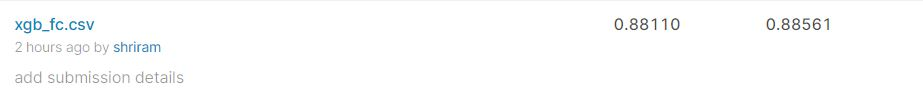

**XGboost + Response Coding **

In [142]:
mod_train = pd.concat((train_data,rc_df_train),axis=1)
mod_train.shape

(32769, 18)

In [143]:
mod_test = pd.concat((test_data,rc_df_test),axis=1)
mod_test.shape

(58921, 18)

In [144]:
from scipy import sparse
mod_train=sparse.csr_matrix(mod_train)
mod_test=sparse.csr_matrix(mod_test)
mod_train.shape,mod_test.shape

((32769, 18), (58921, 18))

In [145]:
# https://stackoverflow.com/questions/43927725/python-hyperparameter-optimization-for-xgbclassifier-using-randomizedsearchcv
from xgboost import XGBClassifier
from scipy import stats
params = {'n_estimators': [10,20,50,100,200,500,750,1000],
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(),
              'min_child_weight': [1, 2, 3, 4]
             }
xgb = XGBClassifier()
clf = RandomizedSearchCV(xgb,params,random_state=42,cv=5,verbose=1,n_iter=100,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(mod_train,y_true)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 15.6min finished


In [146]:
results = pd.DataFrame(best_model.cv_results_)
results.sort_values('mean_test_score',ascending=False,inplace=True)
a=['param_'+str(each) for each in params.keys()]
a.append('mean_test_score')
results[a].head(10)

,param_n_estimators,param_learning_rate,param_subsample,param_max_depth,param_colsample_bytree,param_min_child_weight,mean_test_score
7,500,0.017959,0.808397,3,0.450499,4,0.988997
28,500,0.0141713,0.222108,5,0.860731,1,0.988988
1,200,0.0699849,0.601115,5,0.445833,4,0.988958
98,50,0.220131,0.777147,6,0.591889,3,0.988894
41,20,0.34312,0.996254,6,0.817222,1,0.988640
58,50,0.454461,0.708911,3,0.877373,1,0.988404
91,50,0.185926,0.212728,3,0.448446,4,0.988392
33,100,0.153737,0.447783,4,0.908266,1,0.988390
90,20,0.416062,0.631837,6,0.956801,3,0.988299
85,50,0.264083,0.412618,5,0.547972,1,0.988267


In [147]:
colsample_bytree = clf.best_params_['colsample_bytree']
learning_rate=clf.best_params_['learning_rate']
max_depth=clf.best_params_['max_depth']
min_child_weight=clf.best_params_['min_child_weight']
n_estimators=clf.best_params_['n_estimators']
subsample=clf.best_params_['subsample']
colsample_bytree,learning_rate,max_depth,min_child_weight,n_estimators,subsample

(0.450499251969543, 0.017958976695919917, 3, 4, 500, 0.8083973481164611)

In [148]:
model = XGBClassifier(colsample_bytree=colsample_bytree,learning_rate=learning_rate,max_depth=max_depth,
                     min_child_weight=min_child_weight,n_estimators=n_estimators,subsample=subsample,n_jobs=-1)

model.fit(mod_train,y_true)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.450499251969543, gamma=0,
              learning_rate=0.017958976695919917, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8083973481164611, verbosity=1)

In [149]:
predictions = model.predict_proba(mod_test)[:,1]

submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions

submit.to_csv("results/xgb_rc.csv", index = False)

     Kaggle Score(test AUC )                                                            private score          public score   

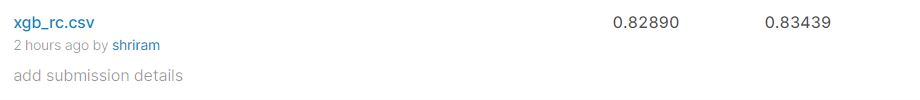

**XGboost + SVD **

In [11]:
mod_train = pd.concat((train_data,train_svd),axis=1)
mod_train.shape

(32769, 81)

In [12]:
mod_test = pd.concat((test_data,test_svd),axis=1)
mod_test.shape

(58921, 81)

In [13]:
from scipy import sparse
mod_train=sparse.csr_matrix(mod_train)
mod_test=sparse.csr_matrix(mod_test)
mod_train.shape,mod_test.shape

((32769, 81), (58921, 81))

In [16]:
# https://stackoverflow.com/questions/43927725/python-hyperparameter-optimization-for-xgbclassifier-using-randomizedsearchcv
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy import stats
params = {'n_estimators': [10,20,50,100,200,500,750,1000],
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(),
              'min_child_weight': [1, 2, 3, 4]
             }
xgb = XGBClassifier(n_jobs=-1)
clf = RandomizedSearchCV(xgb,params,random_state=42,cv=5,verbose=1,n_iter=100,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(mod_train,y_true)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 47.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 56.7min finished


In [17]:
results = pd.DataFrame(best_model.cv_results_)
results.sort_values('mean_test_score',ascending=False,inplace=True)
a=['param_'+str(each) for each in params.keys()]
a.append('mean_test_score')
results[a].head(10)

,param_n_estimators,param_learning_rate,param_subsample,param_max_depth,param_colsample_bytree,param_min_child_weight,mean_test_score
8,750,0.0686033,0.683264,6,0.304614,4,0.863774
18,1000,0.048135,0.665922,9,0.330898,2,0.863765
44,1000,0.060484,0.606429,6,0.642032,2,0.862712
96,500,0.0979629,0.98664,7,0.891897,1,0.862369
62,500,0.0663892,0.328153,9,0.375583,3,0.860342
97,750,0.232385,0.907694,6,0.374271,1,0.857866
49,500,0.160277,0.393098,8,0.636333,2,0.856536
86,1000,0.475848,0.858413,9,0.372018,2,0.853534
14,200,0.374221,0.802197,7,0.965255,1,0.852723
77,100,0.310624,0.615851,7,0.933436,1,0.852379


In [18]:
colsample_bytree = clf.best_params_['colsample_bytree']
learning_rate=clf.best_params_['learning_rate']
max_depth=clf.best_params_['max_depth']
min_child_weight=clf.best_params_['min_child_weight']
n_estimators=clf.best_params_['n_estimators']
subsample=clf.best_params_['subsample']
colsample_bytree,learning_rate,max_depth,min_child_weight,n_estimators,subsample

(0.3046137691733707, 0.06860326840383031, 6, 4, 750, 0.6832635188254582)

In [19]:
model = XGBClassifier(colsample_bytree=colsample_bytree,learning_rate=learning_rate,max_depth=max_depth,
                     min_child_weight=min_child_weight,n_estimators=n_estimators,subsample=subsample,n_jobs=-1)

model.fit(mod_train,y_true)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3046137691733707, gamma=0,
              learning_rate=0.06860326840383031, max_delta_step=0, max_depth=6,
              min_child_weight=4, missing=None, n_estimators=750, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6832635188254582, verbosity=1)

In [20]:
predictions = model.predict_proba(mod_test)[:,1]

submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions

submit.to_csv("results/xgb_svd.csv", index = False)

     Kaggle Score(test AUC )                                                            private score          public score   

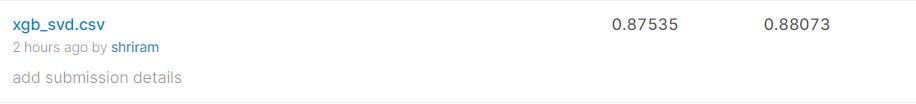

In [172]:
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists
from prettytable import PrettyTable

x=PrettyTable(['Algorithm','Test AUC score'])
x.add_row(['XGBOOST',0.88018])
x.add_row(['XGBOOST (Using Frequency coding)',0.88561])
x.add_row(['XGBOOST (Using OHE)',0.85009])
x.add_row(['XGBOOST (Using SVD)',0.88073])
x.add_row(['XGBOOST (Using Response Coding)',0.83439])
print(x)

+----------------------------------+----------------+
|            Algorithm             | Test AUC score |
+----------------------------------+----------------+
|             XGBOOST              |    0.88018     |
| XGBOOST (Using Frequency coding) |    0.88561     |
|       XGBOOST (Using OHE)        |    0.85009     |
|       XGBOOST (Using SVD)        |    0.88073     |
| XGBOOST (Using Response Coding)  |    0.83439     |
+----------------------------------+----------------+


**OBSERVATIONS**


XGBOOST seems to do well when compared to Random Forest as it gives a better AUC score of 0.880 when applied on raw data
The performance improves further when we use Frequency encoded features


https://catboost.ai/


**CatBoost**


CatBoost is a high-performance open source library for gradient boosting on decision trees


Advantages:
1. Reduce time spent on parameter tuning, because CatBoost provides great results with default parameters

2. Improve your training results with CatBoost that allows you to use non-numeric factors, instead of having to pre-process your data or spend time and effort turning it to numbers.

3. Reduce overfitting when constructing your models with a novel gradient-boosting scheme.

4. Apply your trained model quickly and efficiently even to latency-critical tasks using CatBoost's model applier

In [159]:
# https://www.kaggle.com/mitribunskiy/tutorial-catboost-overview

In [160]:
# https://www.kaggle.com/prashant111/catboost-classifier-tutorial

In [161]:
train_data=train.drop(columns=['ACTION'],axis=1)
train_data.shape

(32769, 9)

In [162]:
y_true = train['ACTION']
y_true.shape

(32769,)

In [163]:
test_data=test.drop(columns=['id'],axis=1)
test_data.shape

(58921, 9)

In [164]:
categorical_features = list(range(train_data.shape[1]))
categorical_features

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [165]:
from catboost import CatBoostClassifier
params = {'loss_function':'Logloss',
         'eval_metric':'AUC',
          'cat_features':categorical_features,
         'verbose':200,
         'random_seed':42}

clf= CatBoostClassifier(**params)
#clf.fit(x_tr,y_tr,eval_set=(x_val,y_val),use_best_model=True)
clf.fit(train_data,y_true)

Learning rate set to 0.045713
0:	total: 248ms	remaining: 4m 7s
200:	total: 28.8s	remaining: 1m 54s
400:	total: 1m 2s	remaining: 1m 33s
600:	total: 1m 35s	remaining: 1m 3s
800:	total: 2m 7s	remaining: 31.7s
999:	total: 2m 40s	remaining: 0us


In [166]:
predictions = clf.predict_proba(test_data)[:,1]

submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions

submit.to_csv("results/submit_cat.csv", index = False)

     Kaggle Score(test AUC )                                                            private score          public score   

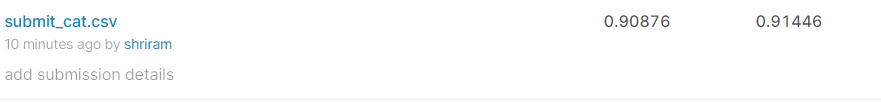

 Of all the models that were used, CatBoost model seems to be best model as it gives the best AUC score of 0.9144
 Also the training time is also faster as compared to other models

In [167]:
import joblib 
joblib.dump(clf,'catboost_model.pkl')

['catboost_model.pkl']